# Generate data for simultaneous least squares problem (damped oscillator) 

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from pprint import pprint

## Damped harmonic oscillator
Differential equation:
$$m \ddot x = -k x - \alpha \dot x$$
After dividing by $m$ one obtains
$$\ddot x + 2 \beta \dot x + \omega_0^2 x = 0; \quad \beta = \frac{\alpha}{2m}$$
In case of undercritical damping ($\beta < \omega_0$) the solution is :
$$x(t) = x_0 e^{- \beta t} \cos(\omega t + \varphi_0); \quad \omega = \sqrt{\omega_0^2 - \beta^2}$$
 
## Driven harmonic oscillator
Differential equation:
$$\ddot x + 2 \beta \dot x + \omega_0^2 x = K \cos \omega t; \quad K = \frac{f}{m}$$

Ansatz:
$$x(t) = A \cos (\omega t + \varphi) $$

Solution
$$A(\omega) = \frac{f/m}{\sqrt{(\omega^2 - \omega_0^2)^2 + 4 \beta^2 \omega^2}}$$

In [168]:
# free damped oscillator
# position vs time (assuming phi_0 = 0)
def x(t, x0, omega_0, beta):
    return x0 * np.exp(-beta * t) * np.cos(np.sqrt(omega_0**2 - beta**2) * t)

In [169]:
# Driven damped oscillator:
# Amplitude vs. driving frequency omega
def A(omega, omega_0, beta, K):
    return K / np.sqrt((omega**2 - omega_0**2)**2 + \
                       (2. * beta * omega)**2)

In [170]:
# Phase shift of the driven oscillator
def phase(omega, omega_0, beta):

    if type(omega) == float or type(omega) == int:
        omega = np.array([omega])
    
    num = -2. * beta * omega
    den = omega_0**2 - omega**2
    
    tanphi = np.divide(
        num, den, out=np.ones_like(num) * np.inf, where=(den!=0))
    
    phi = np.arctan(tanphi)
    phi = np.where(phi > 0, phi-np.pi, phi)
    return phi

### Generate data

In [171]:
np.random.seed(1000)

# oscillator parameters
omega_0 = 4
beta = 0.3
x0 = 0.1
K = 0.2

# meassurement uncertainties
sigma_x = 0.05 * x0
sigma_A = sigma_x / 2.
sigma_ph = 0.1

# damped free oscillator: x(t)
npoints_t = 50
t_data = np.linspace(0, 5.6 * 2 * np.pi / omega_0, npoints_t)
x_smooth = x(t_data, x0, omega_0, beta)
x_data = x_smooth + np.random.normal(0, sigma_x, npoints_t)

# driven oscillator
npoints_omega = 25
omega_min = 3.
omega_max = 6.

omega_data = np.linspace(omega_min, omega_max, npoints_omega)
A_smooth = A(omega_data, omega_0, beta, K)
A_data = A_smooth + np.random.normal(0, sigma_A, npoints_omega)

# phase
ph_smooth = phase(omega_data, omega_0, beta)
ph_data = ph_smooth + np.random.normal(0, sigma_ph, npoints_omega)

<ErrorbarContainer object of 3 artists>

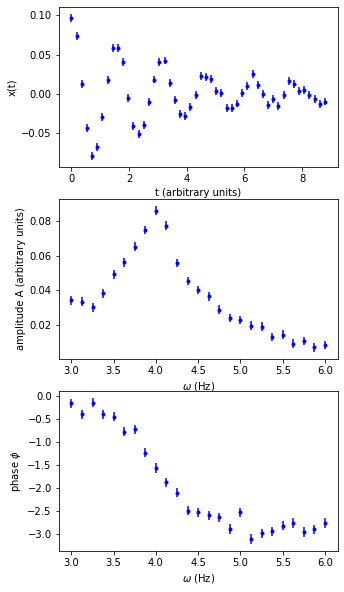

In [172]:
plt.subplots(1, 3, figsize=(5,10))

plt.subplot(311)
plt.errorbar(t_data, x_data, yerr=sigma_x, fmt='b.', ls='none')
plt.xlabel(r't (arbitrary units)')
plt.ylabel(r'x(t)')

plt.subplot(312)
plt.errorbar(omega_data, A_data, yerr=sigma_A, fmt='b.', ls='none')
plt.xlabel(r'$\omega$ (Hz)')
plt.ylabel('amplitude A (arbitrary units)')

plt.subplot(313)
plt.xlabel(r'$\omega$ (Hz)')
plt.ylabel(r'phase $\phi$')
plt.errorbar(omega_data, ph_data, yerr=sigma_ph, fmt='b.', ls='none')

In [173]:
# write text files with data
sig_x = np.full(npoints_t, sigma_x)
data1 = np.vstack((t_data, x_data, sig_x)).T
np.savetxt('damped_free_oscillator.csv', data1, delimiter=',', 
           header='first column: time (a.u.), second column: position of oscillator (a.u.)')

sig_A = np.full(npoints_omega, sigma_A)
sig_ph = np.full(npoints_omega, sigma_ph)
data2 = np.vstack((omega_data, A_data, sig_A, ph_data, sig_ph)).T
np.savetxt('driven_oscillator.csv', data2, delimiter=',',
          header='first column: driving frequency (a.u.), second column: amplitude (a.u.), third column: phase shift (rad)')